<a href="https://colab.research.google.com/github/asir928/IDS/blob/main/HW5/HW5_problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Asir Nayeef

# **Project 5 - Problem 1 (Python)**


1. Importing the data

In [95]:
## install requirements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# convert CSV into dataframe
wine_flag_all = pd.read_csv("wine_flag_all.csv")

In [96]:
#print first 10 rows
wine_flag_all.head(10)

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
5,Red,Low,Low
6,Red,High,Low
7,Red,Low,Low
8,Red,Low,Low
9,Red,Low,Low


2. Testing for missing values.

In [97]:
#Checking for missing values
print(wine_flag_all['Type'].isnull().sum())
print(wine_flag_all['Type'].isna().sum())
print(wine_flag_all['Alcohol_flag'].isnull().sum())
print(wine_flag_all['Alcohol_flag'].isna().sum())
print(wine_flag_all['Sugar_flag'].isnull().sum())
print(wine_flag_all['Sugar_flag'].isna().sum())

0
0
0
0
0
0


There were no missing values in the dataset.


3. Encoding categorical attributes

In [98]:
# import reqs
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save encoded target
enc_wine_flag_all = pd.DataFrame()

# save others
for i in range(0, wine_flag_all.shape[1]):
    if wine_flag_all.dtypes[i]=='object' or wine_flag_all.dtypes[i]=='bool':
        enc_wine_flag_all[wine_flag_all.columns[i]] = le.fit_transform(wine_flag_all[wine_flag_all.columns[i]])


print(wine_flag_all)
print("\n\n")
print(enc_wine_flag_all)

       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]



      Type  Alcohol_flag  Sugar_flag
0        0             0           0
1        0             0           1
2        0             1           0
3        0             0           1
4        0             1           1
...    ...           ...         ...
3340     1             0           0
3341     1             0           1
3342     1             0           1
3343     1             0           1
3344     1             0           1

[3345 rows x 3 columns]


4. Create crosstabs

Type vs. alcohol content

In [99]:
# create crosstab for type vs. alcohol

type_vs_alcohol = pd.crosstab(wine_flag_all['Type'], wine_flag_all['Alcohol_flag'], margins=True)

type_vs_alcohol

Alcohol_flag,High,Low,All
Type,,,
Red,485,600,1085
White,1176,1084,2260
All,1661,1684,3345


Type vs. sugar content

In [100]:
# create crosstab for type vs. sugar

type_vs_sugar = pd.crosstab(wine_flag_all['Type'], wine_flag_all['Sugar_flag'], margins=True)

type_vs_sugar

Sugar_flag,High,Low,All
Type,,,
Red,237,848,1085
White,1382,878,2260
All,1619,1726,3345


5. Plotting crosstab results

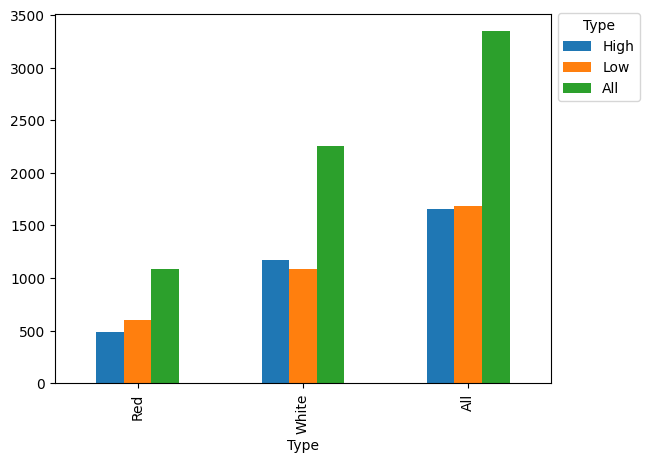

In [101]:
# plot the table
ax1 = type_vs_alcohol.plot(kind="bar", stacked=False)
ax1.legend(title='Type', bbox_to_anchor=(1, 1.02), loc='upper left')

Type vs. sugar

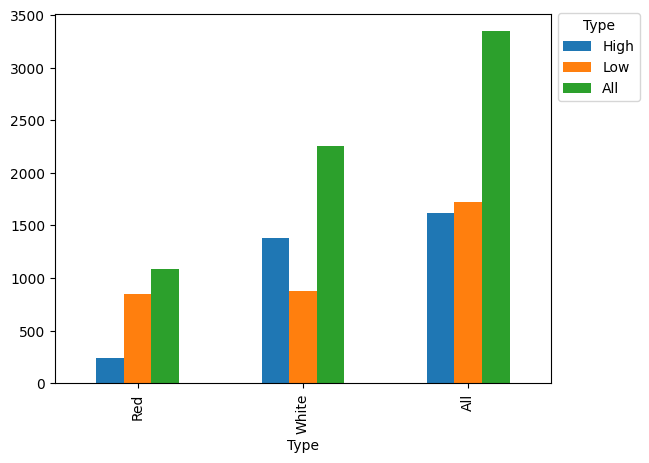

In [102]:
# plot the table
ax2 = type_vs_sugar.plot(kind="bar", stacked=False)
ax2.legend(title='Type', bbox_to_anchor=(1, 1.02), loc='upper left')

6. Calculating probabilities

In [103]:
#total of type red / total number of all wine
print("Wine types")
type_red = type_vs_alcohol['All'].loc[type_vs_alcohol.index[0]] / type_vs_alcohol['All'].loc[type_vs_alcohol.index[2]]
print("prior probability of type red: ", type_red)

#total of type white / total number of all wine
type_white = type_vs_alcohol['All'].loc[type_vs_alcohol.index[1]] / type_vs_alcohol['All'].loc[type_vs_alcohol.index[2]]
print("prior probability of type white: ", type_white)

#Alcohol
print("\n")
print("Alcohol")


#total with high alcohol / total number of all wine
high_alcohol = type_vs_alcohol['High'].loc[type_vs_alcohol.index[2]] / type_vs_alcohol['All'].loc[type_vs_alcohol.index[2]]
print("probability of high alcohol: ", high_alcohol)

#total with low  alcohol / total number of all wine
low_alcohol = type_vs_alcohol['Low'].loc[type_vs_alcohol.index[2]] / type_vs_alcohol['All'].loc[type_vs_alcohol.index[2]]
print("probability of low alcohol: ", low_alcohol)

#Sugar
print("\n")
print("Sugar")


#total with high sugar / total number of all wine
high_sugar = type_vs_sugar['High'].loc[type_vs_sugar.index[2]] / type_vs_sugar['All'].loc[type_vs_sugar.index[2]]
print("probability of high sugar: ", high_sugar)

#total with low sugar / total number of all wine
low_sugar = type_vs_sugar['Low'].loc[type_vs_sugar.index[2]] / type_vs_sugar['All'].loc[type_vs_sugar.index[2]]
print("probability of low sugar: ", low_sugar)

print("\n")

#p(Alcohol_flag = High ∣ Type = Red)
print("High Alcohol | Red wine")

high_alcohol_and_red_wine = type_vs_alcohol['High'].loc[type_vs_alcohol.index[0]] /type_vs_alcohol['All'].loc[type_vs_alcohol.index[0]]
print("(Alcohol_flag = High ∣ Type = Red):", high_alcohol_and_red_wine)
print("(High alcohol):", high_alcohol)
print("\n")

prob_high_alcohol_and_red_wine = (high_alcohol_and_red_wine *type_red)/ high_alcohol
print("(", high_alcohol_and_red_wine, " x ",type_red, ") /", high_alcohol," = ", prob_high_alcohol_and_red_wine )
print("\n")

#p(Alcohol_flag = Low ∣ Type = Red)
print("Low Alcohol | Red wine")

low_alcohol_and_red_wine = type_vs_alcohol['Low'].loc[type_vs_alcohol.index[0]] /type_vs_alcohol['All'].loc[type_vs_alcohol.index[0]]
print("(Alcohol_flag = Low ∣ Type = Red):", low_alcohol_and_red_wine)
print("(Low alcohol):", low_alcohol)
print("\n")

prob_low_alcohol_and_red_wine = (low_alcohol_and_red_wine *type_red)/ low_alcohol
print("(", low_alcohol_and_red_wine, " x ",type_red, ") /", low_alcohol," = ", prob_low_alcohol_and_red_wine )
print("\n")

#p(Sugar_flag = High ∣ Type = Red)
print("High Sugar | Red wine")

high_sugar_and_red_wine = type_vs_sugar['High'].loc[type_vs_sugar.index[0]] /type_vs_sugar['All'].loc[type_vs_sugar.index[0]]
print("(Sugar_flag = High ∣ Type = Red):",high_sugar_and_red_wine)
print("(High sugar):", high_sugar)
print("\n")

prob_high_sugar_and_red_wine = (high_sugar_and_red_wine * type_red)/ high_sugar
print("(", high_sugar_and_red_wine, " x ",type_red, ") /",  high_sugar," = ", prob_high_sugar_and_red_wine)
print("\n")

#p(Sugar_flag =low ∣ Type = Red)
print("Low Sugar | Red wine")
low_sugar_and_red_wine = type_vs_sugar['Low'].loc[type_vs_sugar.index[0]] /type_vs_sugar['All'].loc[type_vs_sugar.index[0]]
print("(Sugar_flag = low ∣ Type = Red):", low_sugar_and_red_wine)
print("(Low Sugar):", low_sugar)
print("\n")

prob_low_sugar_and_red_wine = (low_sugar_and_red_wine * type_red)/ low_sugar
print("(", low_sugar_and_red_wine, " x ",type_red, ") /",  low_sugar," = ", prob_low_sugar_and_red_wine)
print("\n")



Wine types
prior probability of type red:  0.3243647234678625
prior probability of type white:  0.6756352765321375


Alcohol
probability of high alcohol:  0.49656203288490286
probability of low alcohol:  0.5034379671150971


Sugar
probability of high sugar:  0.48400597907324366
probability of low sugar:  0.5159940209267564


High Alcohol | Red wine
(Alcohol_flag = High ∣ Type = Red): 0.4470046082949309
(High alcohol): 0.49656203288490286


( 0.4470046082949309  x  0.3243647234678625 ) / 0.49656203288490286  =  0.29199277543648405


Low Alcohol | Red wine
(Alcohol_flag = Low ∣ Type = Red): 0.5529953917050692
(Low alcohol): 0.5034379671150971


( 0.5529953917050692  x  0.3243647234678625 ) / 0.5034379671150971  =  0.3562945368171022


High Sugar | Red wine
(Sugar_flag = High ∣ Type = Red): 0.2184331797235023
(High sugar): 0.48400597907324366


( 0.2184331797235023  x  0.3243647234678625 ) / 0.48400597907324366  =  0.14638665843113033


Low Sugar | Red wine
(Sugar_flag = low ∣ Type = Red)

Wine types:
* 1085 / 3345 = 0.32 is type red
* 2260 / 3345 = 0.68 is type white

Alcohol content

* 1661 / 3345 = 0.50 has high alcohol
* 1684 / 3345 = 0.50 has low alcohol

Sugar:
* 1619 / 3345 = 0.48 has high sugar
* 1726 / 3345 = 0.52 has low sugar

1. p(Alcohol_flag = High ∣ Type = Red)

 * red and high (485) / all red (1085) = 0.48
 * 1661 / 3345 = 0.50
 * (0.48 * 0.32) /0.50 = about 0.29

2. p(Alcohol_flag = Low ∣ Type = Red)

 * red and low (600) / all red (1085) = 0.55
 * 1684 / 3345 = 0.50
 * (0.55 * 0.32) /0.50 = about 0.36

3. p(Sugar_flag = High ∣ Type = Red)

 * red and high (237) / all red (1085) = 0.23
 * 1619 / 3345 = 0.48
 * (0.23 * 0.32) / 0.48 = about 0.15

4. p(Sugar_flag = Low ∣ Type = Red)

 * red and low (848) / all red (1085) = 0.78
 * 1726 / 3345 = 0.52
 * (0.78 * 0.32) / 0.52 = about 0.49

7. Generate Naive bayes models and use them for data testing (includes plots)

80-20

In [104]:
#import the NB modules
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import train_test_split

# make a NB model
NBmodel = GaussianNB()

#prepare input/output
X = enc_wine_flag_all.iloc[:,1:3]
y = enc_wine_flag_all.iloc[:,0]

#
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.20, stratify=y)

#display sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2688             0           1
1824             1           0
2483             0           0
935              1           1
2017             1           0
...            ...         ...
2650             0           1
2246             1           1
3001             0           1
11               1           1
2854             0           1

[2676 rows x 2 columns]
      Alcohol_flag  Sugar_flag
288              0           1
3047             0           1
2197             1           1
3132             0           0
682              1           0
...            ...         ...
864              0           1
2505             0           0
232              1           1
2467             0           0
2634             0           0

[669 rows x 2 columns]


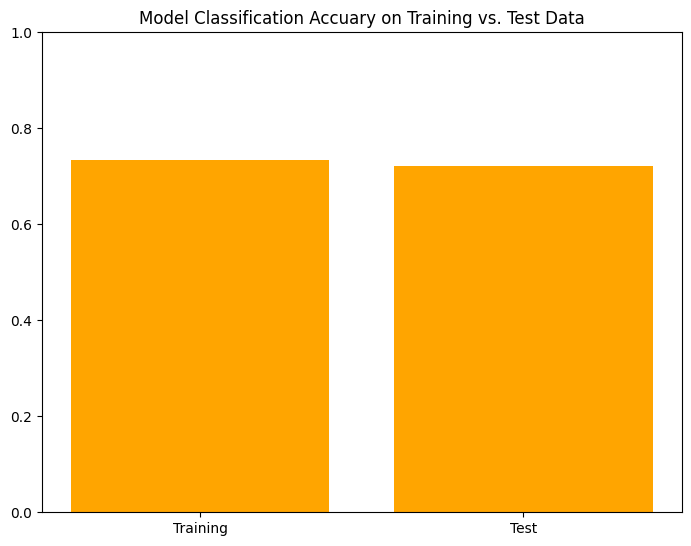

In [105]:
import matplotlib.pyplot as plt

# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax3 = fig.add_axes([0,0,1,1])
ax3.set_title('Model Classification Accuary on Training vs. Test Data')
ax3.bar(labels, scores, color="orange")
ax3.set_ylim(0, 1)
plt.show()

75-25

In [106]:
NBmodel2 = GaussianNB()

#prepare input/output
X = enc_wine_flag_all.iloc[:,1:3]
y = enc_wine_flag_all.iloc[:,0]

#
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=72, shuffle=True, test_size=0.25, stratify=y)

#display sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
707              0           1
1048             1           0
1190             1           1
1240             1           0
1003             1           1
...            ...         ...
534              0           1
2147             1           0
2895             0           1
713              1           1
564              1           0

[2508 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1978             1           1
2353             1           0
992              0           0
3217             0           1
2656             0           1
...            ...         ...
1847             1           1
2788             0           1
2999             0           0
2652             0           1
2254             1           1

[837 rows x 2 columns]


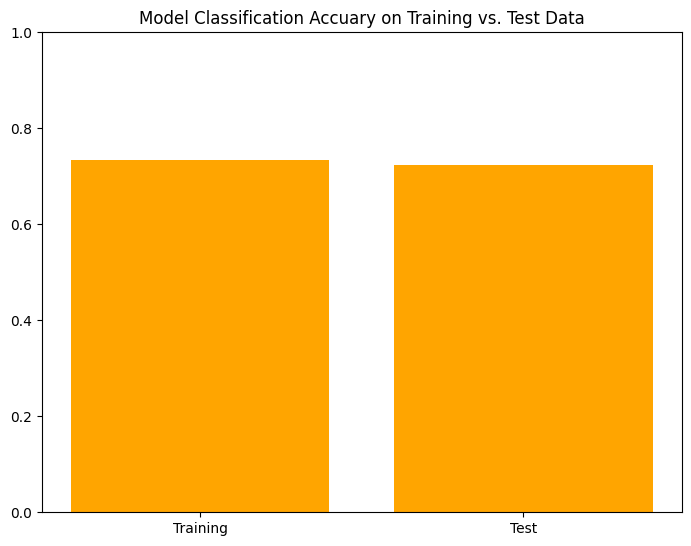

In [107]:
# Train the model
NBmodel2.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel2.score(X_train, y_train), NBmodel2.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax3 = fig.add_axes([0,0,1,1])
ax3.set_title('Model Classification Accuary on Training vs. Test Data')
ax3.bar(labels, scores, color="orange")
ax3.set_ylim(0, 1)
plt.show()

70-30

In [108]:
#make new model
NBmodel3 = GaussianNB()

#prepare input/output
X = enc_wine_flag_all.iloc[:,1:3]
y = enc_wine_flag_all.iloc[:,0]

#
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=332, shuffle=True, test_size=0.30, stratify=y)

#display sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1787             1           1
1119             1           1
1362             0           1
199              0           1
1453             0           1
...            ...         ...
2125             1           0
275              1           1
2496             0           1
3063             0           1
2119             1           0

[2341 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1141             1           1
1177             1           1
532              0           1
2100             1           0
1888             1           0
...            ...         ...
2855             0           0
1156             1           1
1896             1           1
1443             0           1
22               0           1

[1004 rows x 2 columns]


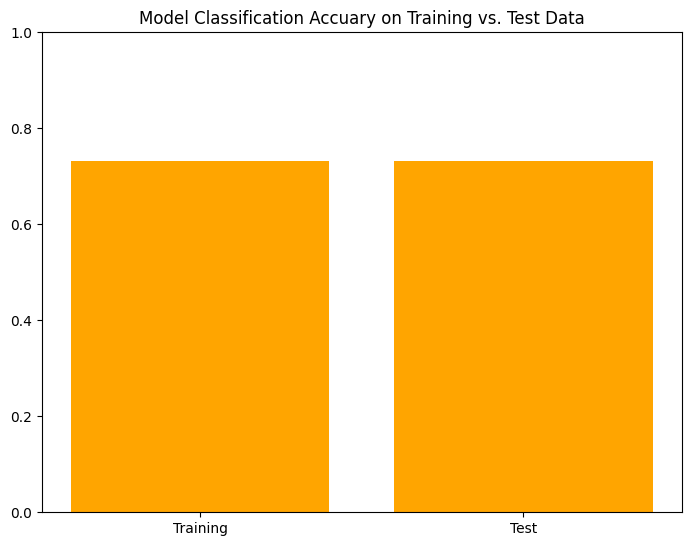

In [109]:
# Train the model
NBmodel3.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel3.score(X_train, y_train), NBmodel3.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax3 = fig.add_axes([0,0,1,1])
ax3.set_title('Model Classification Accuary on Training vs. Test Data')
ax3.bar(labels, scores, color="orange")
ax3.set_ylim(0, 1)
plt.show()

60-40

In [110]:
#make new model
NBmodel4 = GaussianNB()

#prepare input/output
X = enc_wine_flag_all.iloc[:,1:3]
y = enc_wine_flag_all.iloc[:,0]

#
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=423, shuffle=True, test_size=0.40, stratify=y)

#display sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2499             0           1
298              1           1
2789             0           1
2030             1           0
1945             1           0
...            ...         ...
1319             0           1
3125             0           0
917              1           1
226              1           1
2985             0           1

[2007 rows x 2 columns]
      Alcohol_flag  Sugar_flag
92               0           1
2080             1           0
1091             1           1
1808             1           0
1173             1           1
...            ...         ...
1559             0           1
2207             1           0
1049             1           0
1612             1           0
406              0           1

[1338 rows x 2 columns]


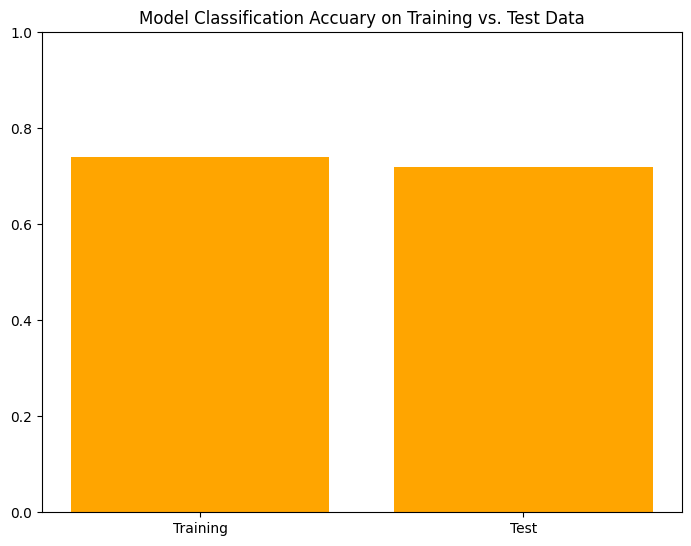

In [111]:
# Train the model
NBmodel4.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel4.score(X_train, y_train), NBmodel4.score(X_test, y_test)]

# Plot the accuracy claues
fig = plt.figure()
ax3 = fig.add_axes([0,0,1,1])
ax3.set_title('Model Classification Accuary on Training vs. Test Data')
ax3.bar(labels, scores, color="orange")
ax3.set_ylim(0, 1)
plt.show()

50-50

In [112]:
#make new model
NBmodel5 = GaussianNB()

#prepare input/output
X = enc_wine_flag_all.iloc[:,1:3]
y = enc_wine_flag_all.iloc[:,0]

#
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=203, shuffle=True, test_size=0.50, stratify=y)

#display sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
973              1           0
1879             1           0
2184             1           0
1123             1           1
706              0           0
...            ...         ...
1443             0           1
1824             1           0
1505             0           1
3172             0           1
1181             1           1

[1672 rows x 2 columns]
      Alcohol_flag  Sugar_flag
3275             0           1
2615             0           0
3221             0           1
1699             1           1
1525             0           0
...            ...         ...
956              1           0
1135             1           1
1759             1           0
2996             0           0
786              0           0

[1673 rows x 2 columns]


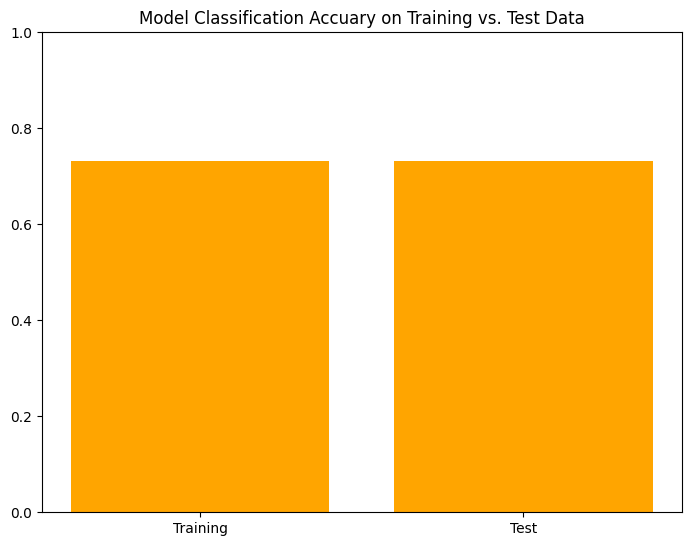

In [113]:
# Train the model
NBmodel5.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel5.score(X_train, y_train), NBmodel5.score(X_test, y_test)]

# Plot the accuracy claues
fig = plt.figure()
ax3 = fig.add_axes([0,0,1,1])
ax3.set_title('Model Classification Accuary on Training vs. Test Data')
ax3.bar(labels, scores, color="orange")
ax3.set_ylim(0, 1)
plt.show()